## データの読込

In [1]:
import pandas as pd
df = pd.read_csv("vgsales-12-4-2019.csv")
df.head(3)

Rank               Name          basename     Genre ESRB_Rating Platform  \
0     1         Wii Sports        wii-sports    Sports           E      Wii   
1     2  Super Mario Bros.  super-mario-bros  Platform         NaN      NES   
2     3     Mario Kart Wii    mario-kart-wii    Racing           E      Wii   

  Publisher     Developer  VGChartz_Score  Critic_Score  ...  NA_Sales  \
0  Nintendo  Nintendo EAD             NaN           7.7  ...       NaN   
1  Nintendo  Nintendo EAD             NaN          10.0  ...       NaN   
2  Nintendo  Nintendo EAD             NaN           8.2  ...       NaN   

   PAL_Sales  JP_Sales  Other_Sales    Year  Last_Update  \
0        NaN       NaN          NaN  2006.0          NaN   
1        NaN       NaN          NaN  1985.0          NaN   
2        NaN       NaN          NaN  2008.0  11th Apr 18   

                                                 url  status Vgchartzscore  \
0  http://www.vgchartz.com/game/2667/wii-sports/?...       1           NaN   
1  http://www.vgchartz.com/game/6455/super-mario-...       1           NaN   
2  http://www.vgchartz.com/game/6968/mario-kart-w...       1           8.7   

                                         img_url  
0  /games/boxart/full_2258645AmericaFrontccc.jpg  
1                   /games/boxart/8972270ccc.jpg  
2  /games/boxart/full_8932480AmericaFrontccc.jpg  

[3 rows x 23 columns]

In [2]:
import os
import numpy as np
import random

In [3]:
# シード値の固定
SEED = 42

random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

## 01 EDA

## describe

In [4]:
df.describe(include='all')

Rank                Name basename  Genre ESRB_Rating Platform  \
count   55792.000000               55792    55792  55792       23623    55792   
unique           NaN               37102    36672     20           8       74   
top              NaN  Plants vs. Zombies     fate   Misc           E       PC   
freq             NaN                  20       23   9476       10811    10978   
mean    27896.500000                 NaN      NaN    NaN         NaN      NaN   
std     16105.907446                 NaN      NaN    NaN         NaN      NaN   
min         1.000000                 NaN      NaN    NaN         NaN      NaN   
25%     13948.750000                 NaN      NaN    NaN         NaN      NaN   
50%     27896.500000                 NaN      NaN    NaN         NaN      NaN   
75%     41844.250000                 NaN      NaN    NaN         NaN      NaN   
max     55792.000000                 NaN      NaN    NaN         NaN      NaN   

       Publisher Developer  VGChartz_Score  Critic_Score  ...      NA_Sales  \
count      55792     55775             0.0   6536.000000  ...  12964.000000   
unique      3069      8064             NaN           NaN  ...           NaN   
top      Unknown   Unknown             NaN           NaN  ...           NaN   
freq        4891      4756             NaN           NaN  ...           NaN   
mean         NaN       NaN             NaN      7.213709  ...      0.275541   
std          NaN       NaN             NaN      1.454079  ...      0.512809   
min          NaN       NaN             NaN      1.000000  ...      0.000000   
25%          NaN       NaN             NaN      6.400000  ...      0.050000   
50%          NaN       NaN             NaN      7.500000  ...      0.120000   
75%          NaN       NaN             NaN      8.300000  ...      0.290000   
max          NaN       NaN             NaN     10.000000  ...      9.760000   

           PAL_Sales     JP_Sales   Other_Sales          Year  Last_Update  \
count   13189.000000  7043.000000  15522.000000  54813.000000         9186   
unique           NaN          NaN           NaN           NaN          430   
top              NaN          NaN           NaN           NaN  29th Mar 19   
freq             NaN          NaN           NaN           NaN          227   
mean        0.155263     0.110402      0.044719   2005.659095          NaN   
std         0.399257     0.184673      0.129554      8.355585          NaN   
min         0.000000     0.000000      0.000000   1970.000000          NaN   
25%         0.010000     0.020000      0.000000   2000.000000          NaN   
50%         0.040000     0.050000      0.010000   2008.000000          NaN   
75%         0.140000     0.120000      0.040000   2011.000000          NaN   
max         9.850000     2.690000      3.120000   2020.000000          NaN   

                                                      url   status  \
count                                               55792  55792.0   
unique                                              55791      NaN   
top     http://www.vgchartz.com/game/41330/gran-turism...      NaN   
freq                                                    2      NaN   
mean                                                  NaN      1.0   
std                                                   NaN      0.0   
min                                                   NaN      1.0   
25%                                                   NaN      1.0   
50%                                                   NaN      1.0   
75%                                                   NaN      1.0   
max                                                   NaN      1.0   

       Vgchartzscore                    img_url  
count     799.000000                      55792  
unique           NaN                      47601  
top              NaN  /games/boxart/default.jpg  
freq             NaN                       8178  
mean        7.425907                        NaN  
std         1.38

## Pandas-Profile

In [8]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [6]:
import sweetviz as sv
from IPython.display import HTML

my_report = sv.analyze(df)
my_report.show_html()
HTML("/content/SWEETVIZ_REPORT.html")

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## ベン図(カテゴリーデータの分布の比較)

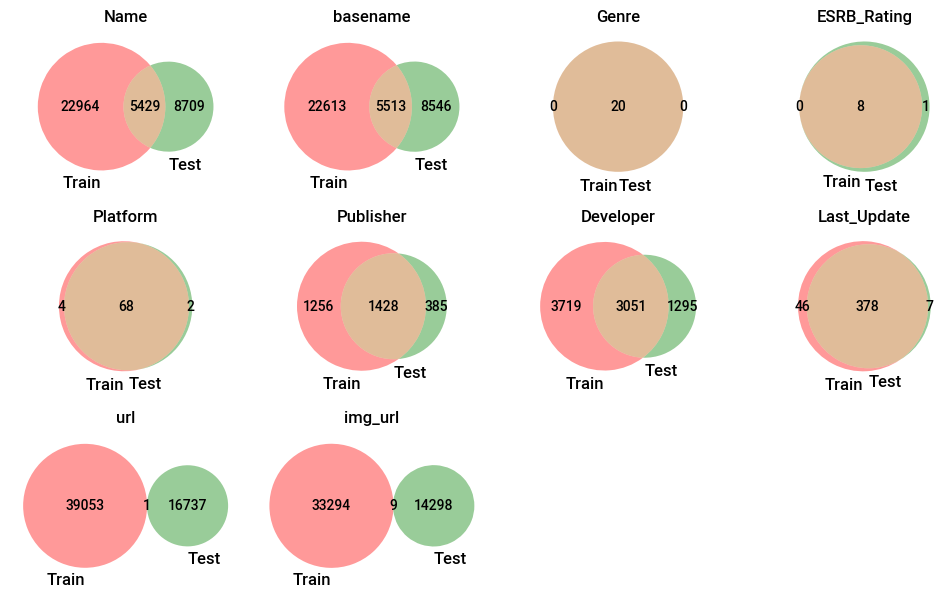

In [12]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

plt.figure(figsize=(10, 20))

for i, column in enumerate(df.select_dtypes(include=object).columns):

    plt.subplot(10, 4, i+1)
    set1 = set(train[column])
    set2 = set(test[column])

    plt.title(column)
    venn2([set1, set2], ('Train', 'Test'))

plt.tight_layout()
plt.show()

## ヒストグラム(数値データの分布の比較)

nanの数 train: 0 test: 0


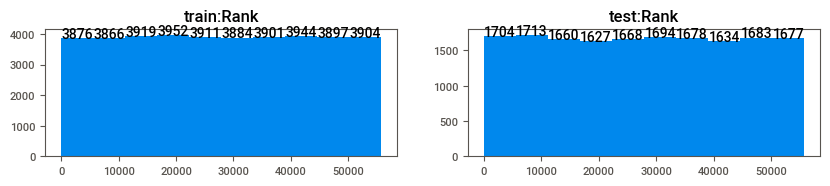

nanの数 train: 39054 test: 16738


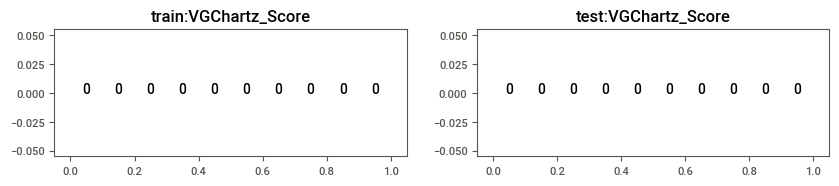

nanの数 train: 34503 test: 14753


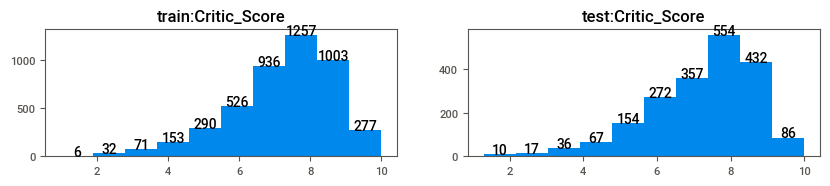

nanの数 train: 38824 test: 16633


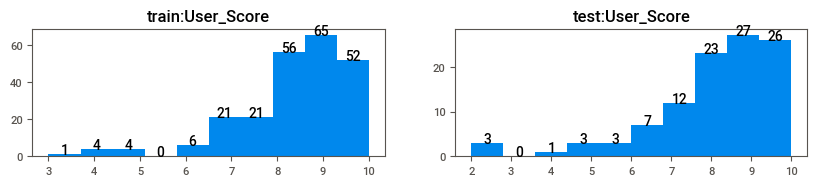

nanの数 train: 37761 test: 16204


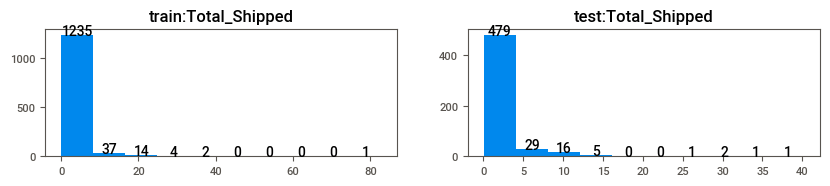

nanの数 train: 25514 test: 10863


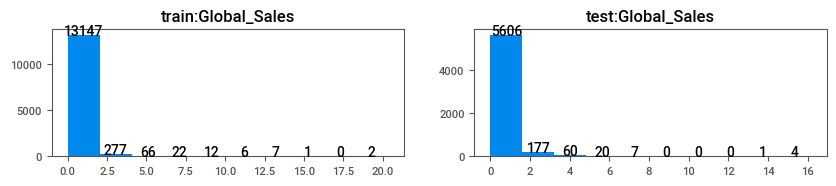

nanの数 train: 30042 test: 12786


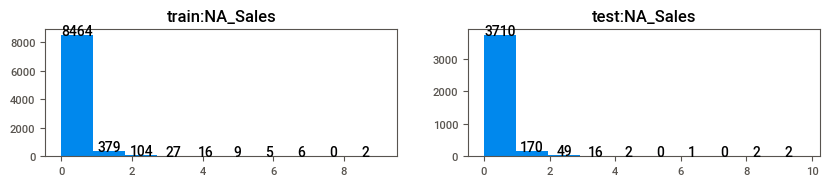

nanの数 train: 29887 test: 12716


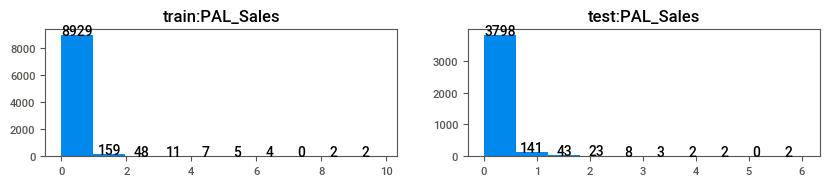

nanの数 train: 34145 test: 14604


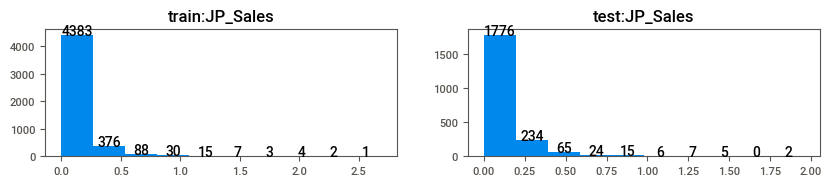

nanの数 train: 28280 test: 11990


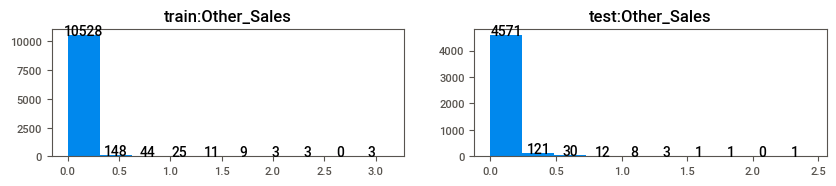

nanの数 train: 672 test: 307


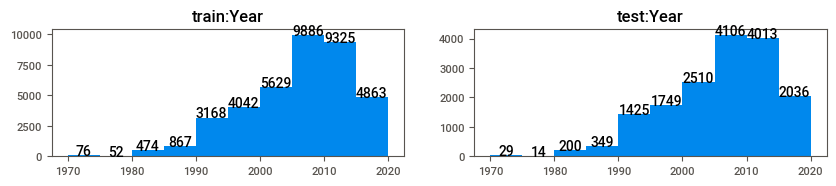

nanの数 train: 0 test: 0


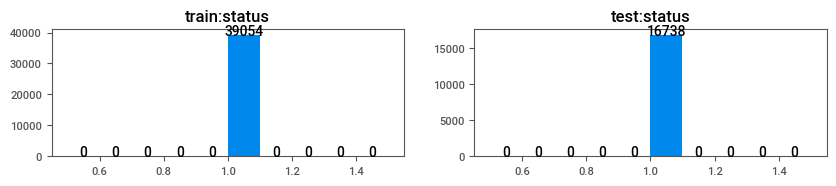

nanの数 train: 38489 test: 16504


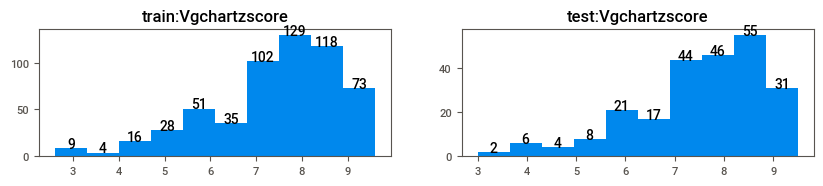

<Figure size 600x400 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

for i, column in enumerate(df.select_dtypes(include='number').columns):

    print("nanの数 train:", train[column].isnull().sum(), "test:", test[column].isnull().sum())

    plt.figure(figsize=(10, 40))

    plt.subplot(20, 2, i*2+1)
    plt.title("train:" + column)
    n, bins, _  = plt.hist(train[column].dropna())
    xs = (bins[:-1] + bins[1:])/2
    ys = n.astype(int)
    for x, y in zip(xs, ys):
        plt.text(x, y, str(y), horizontalalignment="center")

    plt.subplot(20, 2, i*2+2)
    plt.title("test:" + column)
    n, bins, _  = plt.hist(test[column].dropna())
    xs = (bins[:-1] + bins[1:])/2
    ys = n.astype(int)
    for x, y in zip(xs, ys):
        plt.text(x, y, str(y), horizontalalignment="center")

    plt.show()

plt.tight_layout()

## 相関係数のヒートマップ

<AxesSubplot:>

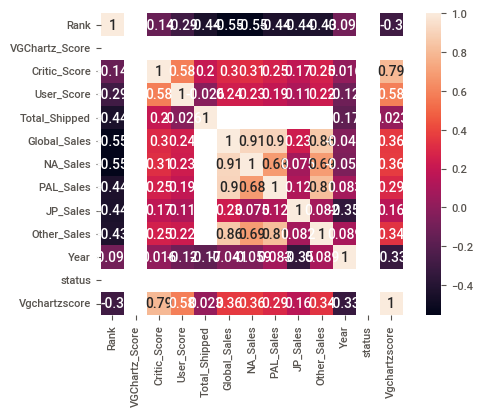

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), square=True, annot=True)

## PairPlot

<Figure size 4000x4000 with 0 Axes>

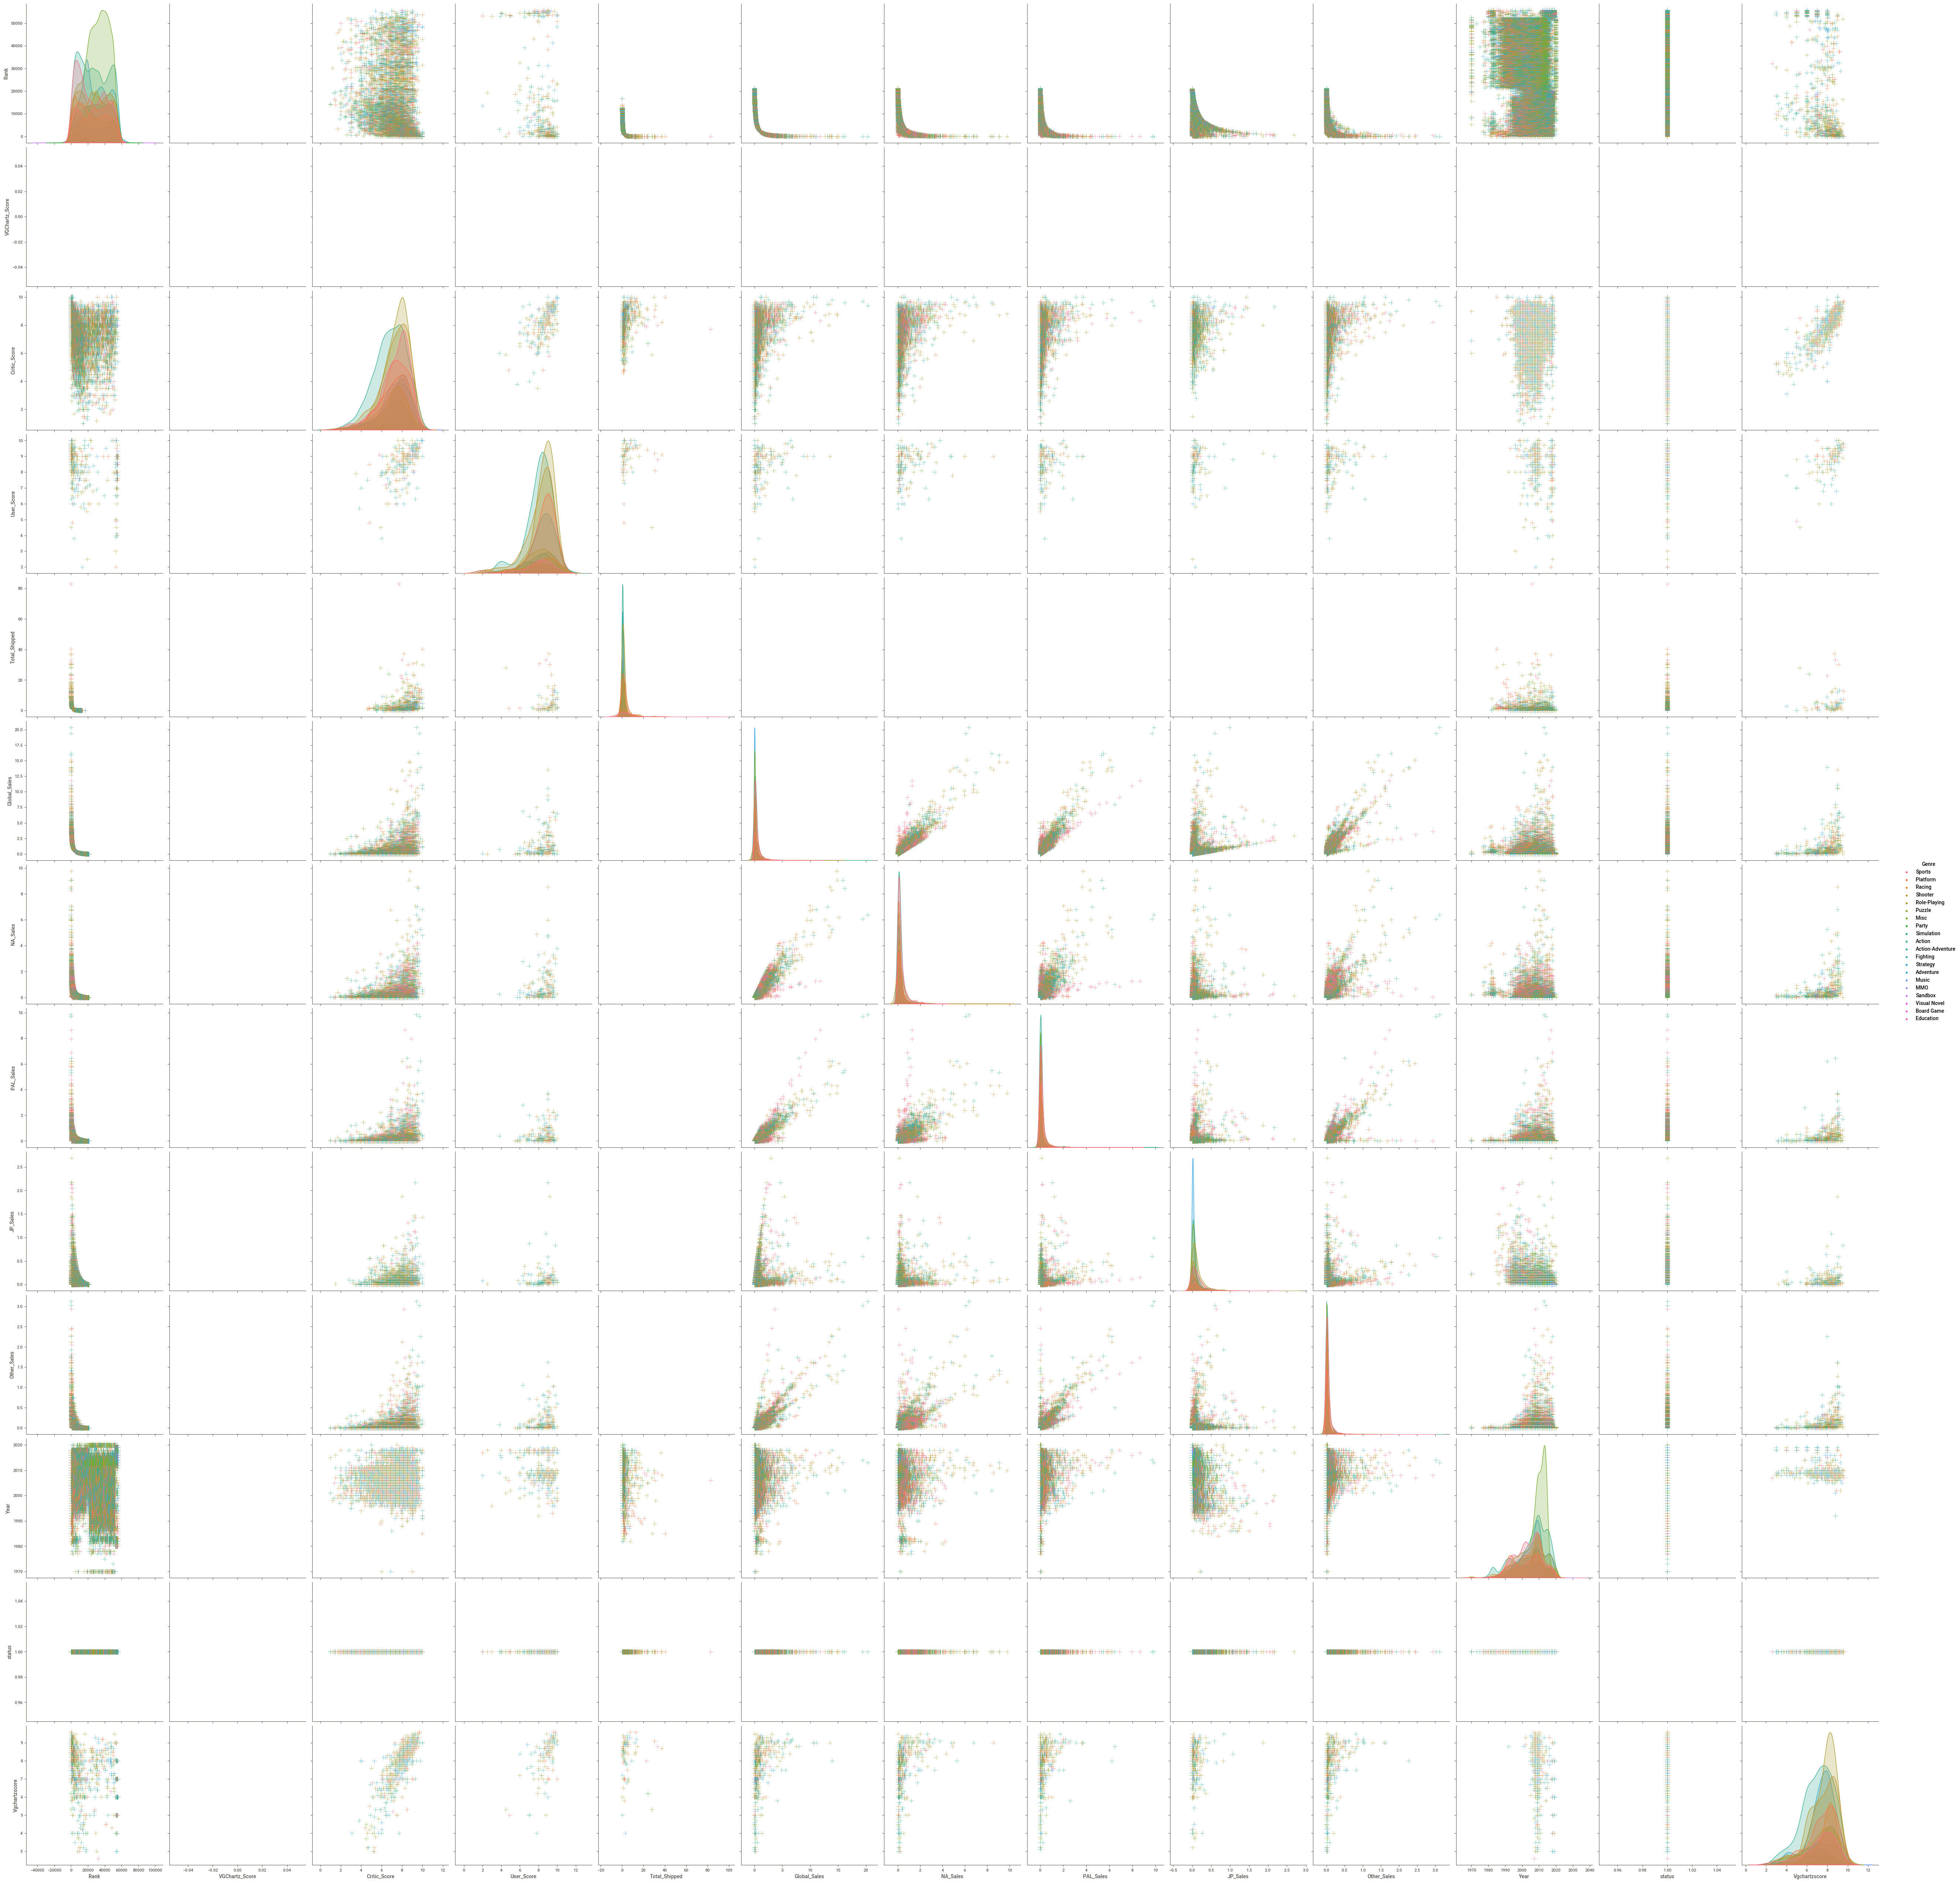

In [15]:
import matplotlib
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(40, 40))
sns.pairplot(
             df, 
             hue='Genre', 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             markers='+',
             height = 4
             );

In [16]:
# 指定用の数値データカラム
df.select_dtypes(include="number").columns

Index(['Rank', 'VGChartz_Score', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year', 'status', 'Vgchartzscore'],
      dtype='object')

<Figure size 4000x4000 with 0 Axes>

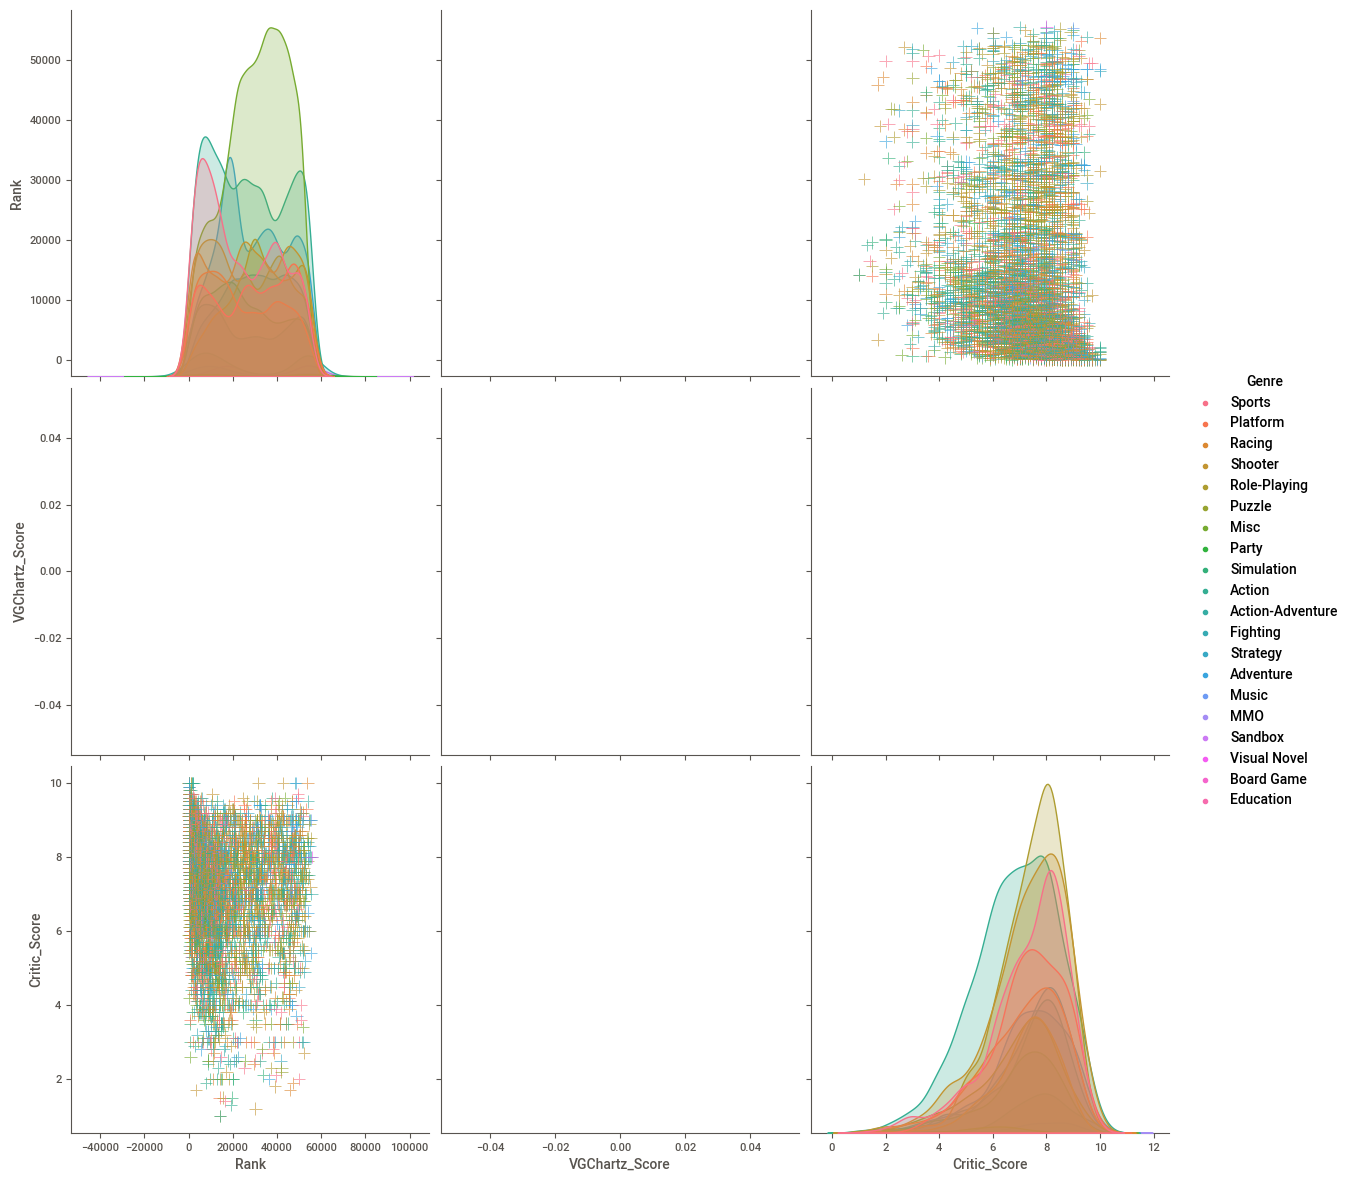

In [17]:
# カラム指定
plt.figure(figsize=(40, 40))
sns.pairplot(
             df, 
             hue='Genre', 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             vars = ['Rank', 'VGChartz_Score', 'Critic_Score'],
             markers='+',
             height = 4
             );